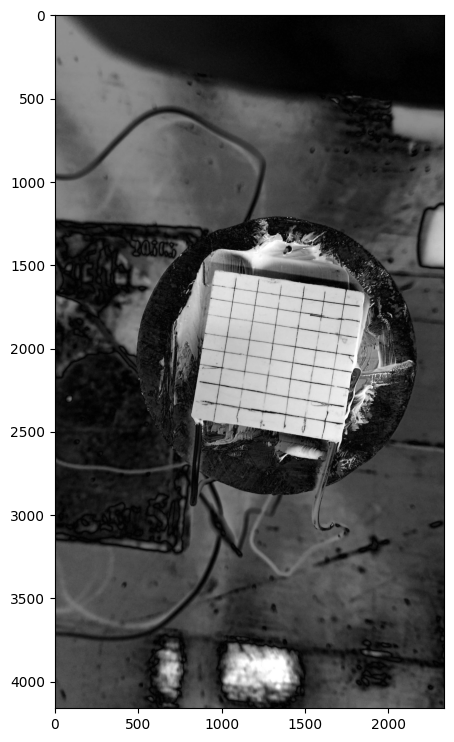

In [42]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img=cv.imread('pic.jpeg', cv.IMREAD_GRAYSCALE)
# Read the img2
img2 = cv.imread("pic.jpeg",cv.IMREAD_GRAYSCALE)
img2= cv.cvtColor(img2, cv.COLOR_RGB2BGR)

# Adjust contrast and brightness
alpha = 1.85  # Contrast control (>1 increases contrast, <1 decreases)
beta = -160    # Brightness control (positive = brighter, negative = darker)

# Apply the transformation
adjusted = cv.convertScaleAbs(img2, alpha=alpha, beta=beta)

plt.figure(figsize=(16,9))
plt.imshow(adjusted)

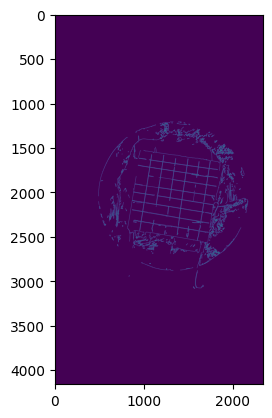

In [35]:

# Load the image
# image = cv2.imread("pic.jpeg",cv2.IMREAD_GRAYSCALE)
kernel=3
# Convert to grayscale
gray = cv.cvtColor(img2, cv.IMREAD_GRAYSCALE)

blurred = cv.GaussianBlur(img2, (kernel, kernel), sigmaX=3)

# Canny edge detection (you may need to tune these thresholds)
edges = cv.Canny(blurred, 50, 150)

plt.figure()
plt.imshow(edges)



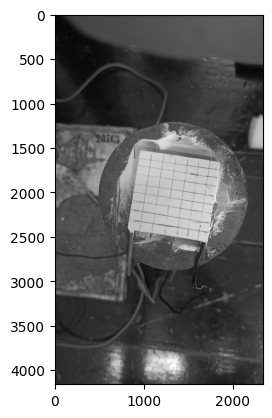

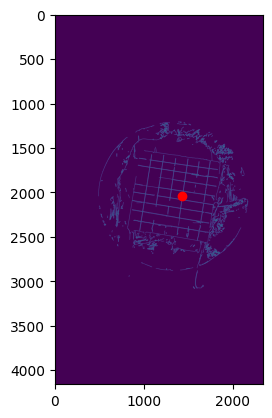

In [43]:

# Find contours from edges
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours and compute centroid(s)
for edge in contours:
    M = cv.moments(edges)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        # Draw the centroid on the image
        # cv.circle(image, (cx, cy), 5, (0, 0, 55), -1)

# Show results
plt.figure()
plt.imshow(img2)
plt.figure()
plt.imshow(edges)
plt.plot(cx,cy,'ro')

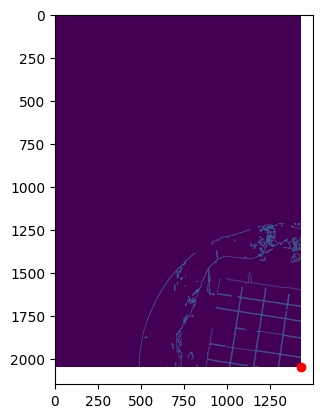

In [37]:
plt.imshow(edges[:cy,:cx])
plt.plot(cx,cy,'ro')

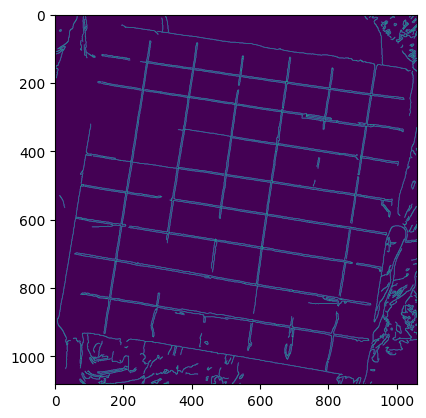

In [44]:
img2=edges
xx=640  
yy=600
img2= img2[1501:2583 , 808:1867]
plt.imshow(img2)

In [39]:
# """
# @file hough_lines.py
# @brief This program demonstrates line finding with the Hough transform
# """
# import sys
# import math
# import cv2 as cv
# import numpy as np


# def main(argv):
#     ## [load]
#     default_file = 'pic.jpeg'
#     filename = argv[0] if len(argv) > 0 else default_file

#     # Loads an image
#     src = img2

#     # Check if image is loaded fine
#     if src is None:
#         print ('Error opening image!')
#         print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
#         return -1
#     ## [load]

#     ## [edge_detection]
#     # Edge detection
#     dst = cv.Canny(src, 50, 200, None, 3)
#     ## [edge_detection]

#     # Copy edges to the images that will display the results in BGR
#     cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
#     cdstP = np.copy(cdst)

#     ## [hough_lines]
#     #  Standard Hough Line Transform
#     lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
#     ## [hough_lines]
#     ## [draw_lines]
#     # Draw the lines
#     if lines is not None:
#         for i in range(0, len(lines)):
#             rho = lines[i][0][0]
#             theta = lines[i][0][1]
#             a = math.cos(theta)
#             b = math.sin(theta)
#             x0 = a * rho
#             y0 = b * rho
#             pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#             pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

#             cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
#     ## [draw_lines]

#     ## [hough_lines_p]
#     # Probabilistic Line Transform
#     linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
#     ## [hough_lines_p]
#     ## [draw_lines_p]
#     # Draw the lines
#     if linesP is not None:
#         for i in range(0, len(linesP)):
#             l = linesP[i][0]
#             cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
#     ## [draw_lines_p]
#     ## [imshow]
#     # Show results
#     cv.imshow("Source", src)
#     cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
#     cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
#     ## [imshow]
#     ## [exit]
#     # Wait and Exit
#     cv.waitKey()
#     return 0
#     ## [exit]

# if __name__ == "__main__":
#     main(sys.argv[1:])


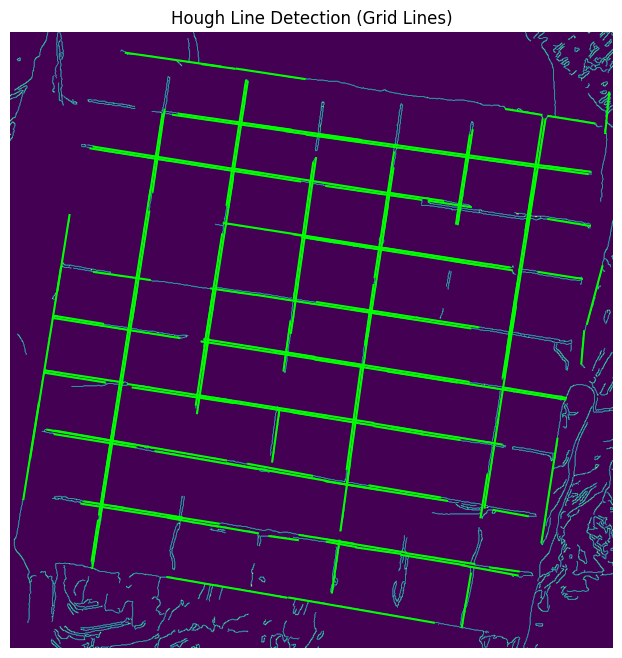

In [64]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# # Load and preprocess the image
# image = img
# gray= img
# # gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# blurred = cv.GaussianBlur(gray, (5, 5), 1)

# # Edge detection
# edges = cv.Canny(blurred, 50, 150, apertureSize=3)
edges = img2
# Hough Line detection (Probabilistic)
lines = cv.HoughLinesP(edges,
                       rho=1,
                       theta=np.pi/180,
                       threshold=100,
                       minLineLength=50,
                       maxLineGap=10)

# Convert BGR image to RGB for matplotlib
# image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Plotting with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(edges)
plt.axis('off')

# Draw the lines on top
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
    if abs(angle) < 10 or (angle - 90) < -10:  # Horizontal or vertical tolerance
        plt.plot([x1, x2], [y1, y2], color='lime')






plt.title("Hough Line Detection (Grid Lines)")
plt.show()
